# Introduction to Probabilistic Programming

-----

In this notebook, we build 

-----

[1]: https://github.com/ericmjl/bayesian-analysis-recipes/blob/master/poisson-regression.ipynb
[2]: https://gist.github.com/AustinRochford/d83ecc6acd17a632a2b9df788386540b

## Table of Contents

[](#)

[](#)


-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## XXX YYY

A 

-----
[wcn]: https://en.wikipedia.org/



In [2]:
# Define random state for reproducability
rng = np.random.RandomState(23)

# Generate normal data
mu = 0.0
sigma = 1.0
size = 1000
data = rng.normal(mu, sigma, size)

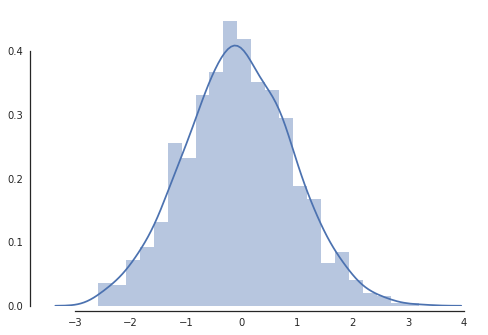

In [3]:
# Plot data distribution
sns.distplot(data)
sns.despine(offset = 5, trim=True)

In [4]:
print(f'Mean = {np.mean(data):4.3f}')
print(f'Std  = {np.std(data):4.3f}')

Mean = -0.061
Std  = 0.962


In [5]:
# Use PyMC3 to sample mean and standard deviation
import pymc3 as pm

In [6]:
n_samples = 10000

with pm.Model() as model:
    
    # First, define stohastic model variables
    mean = pm.Uniform('mean', lower = -1, upper = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
   
    # Sample values (likelihood)
    likelihood = pm.Normal('likelihood', mu=mean, sd=sigma, observed=data)
    
    # Generate trace samples
    trace = pm.sample(n_samples, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,388.5: 100%|██████████| 200000/200000 [00:25<00:00, 7981.15it/s]
Finished [100%]: Average ELBO = -1,388.5
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
100%|██████████| 10000/10000 [00:10<00:00, 987.69it/s]


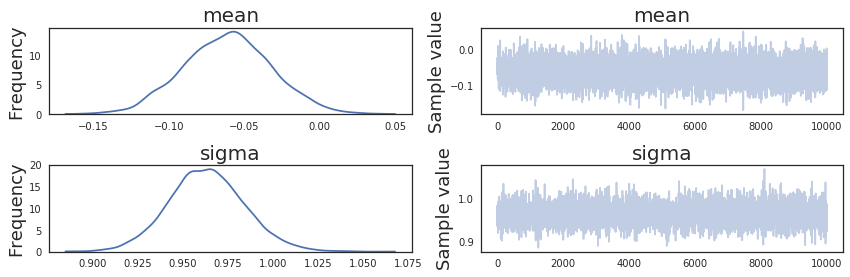

In [7]:
_ = pm.traceplot(trace)

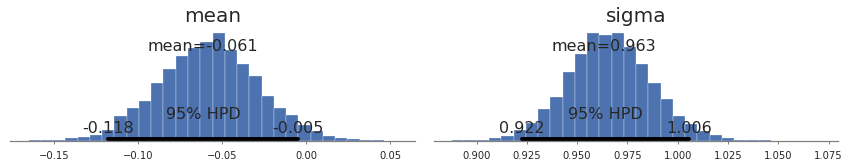

In [8]:
_ = pm.plot_posterior(trace)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced the **XYZ**. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the 
2. Try 
3. Try 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

12. Wikipedia article on [Probabilistic Programming][wpp] languages
3. Introduction to [Probabilistic Programming][gpp]
45. Overview of [Probabilistic Programming][ipp]
12. Discussion on [Probabilistic Programming][ppe]
3. Notebook introduction to [Probabilistic Programming][npp]
3. Chapter one on [Introducing PyMC3][bmh1] from _Bayesian Method for Hackers_ by Cam Davidson Pilon
12. PyMC3 documentation on [getting started with PyMC3][ipymc3]
13. Discussion on algorithms [behind Probabilistic Programming][ffl] along with a [demonstration of Probabilistic Programming][fflrn]
14. Chapter one [introducing Probabilistic Programming][mpp1] from _Practical Probabilistic Programming_ by Avi Pfeffer
15. Demonstration of Probabilistic Programming by calculating how to prepare for [soccer free kicks][spp]
143. Overview of [Probabilistic Programming][opp]
22. Notebook demonstration of [Probabilistic Programming][npp]
54. Overview on the differences between [frequentist and Bayesian statistical modeling][jvdp]

-----

[npp]: https://github.com/jdwittenauer/ipython-notebooks/blob/master/notebooks/misc/ProbablisticProgramming.ipynb
[gpp]: https://github.com/zipfian/probabilistic-programming-intro
[ipp]: https://github.com/fastforwardlabs/probabilistic-programming-from-scratch/blob/master/probabilistic-programming-from-scratch.ipynb

[wpp]: https://en.wikipedia.org/wiki/Probabilistic_programming_language

[aibpymc3]: http://blog.applied.ai/bayesian-inference-with-pymc3-part-1/

[bmh1]: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb

[ipymc3]: https://pymc-devs.github.io/pymc3/notebooks/getting_started.html

[jvdp]: https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/

[ffl]: http://blog.fastforwardlabs.com/2017/01/30/the-algorithms-behind-probabilistic-programming.html

[fflrn]: http://fastforwardlabs.github.io/pre/#/probability/1000000-50/2016/all_boroughs/all_neighborhoods?explainer=true&_k=3dirsi

[mpp1]: https://livebook.manning.com/#!/book/practical-probabilistic-programming/chapter-1/1

[ppe]: http://www.pl-enthusiast.net/2014/09/08/probabilistic-programming/

[bps]: http://austinrochford.com/posts/2017-10-02-bayes-param-survival.html

[npp]: http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/misc/ProbablisticProgramming.ipynb

[opp]: https://gist.github.com/AustinRochford/d83ecc6acd17a632a2b9df788386540b

[spp]: http://www.americansocceranalysis.com/home/2017/11/6/whats-the-point-of-practicing-penalties

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode